<a href="https://colab.research.google.com/github/cc-huang-0716/colab/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fixed acidity: 相關係數=-0.114, P值=0.000
.......................................................................
volatile acidity: 相關係數=-0.195, P值=0.000
.......................................................................
citric acid: 相關係數=-0.009, P值=0.519
.......................................................................
residual sugar: 相關係數=-0.098, P值=0.000
.......................................................................
chlorides: 相關係數=-0.210, P值=0.000
.......................................................................
free sulfur dioxide: 相關係數=0.008, P值=0.568
.......................................................................
total sulfur dioxide: 相關係數=-0.175, P值=0.000
.......................................................................
density: 相關係數=-0.307, P值=0.000
.......................................................................
pH: 相關係數=0.099, P值=0.000
.......................................................................
sulphates: 相關係數=0.054, P值=0

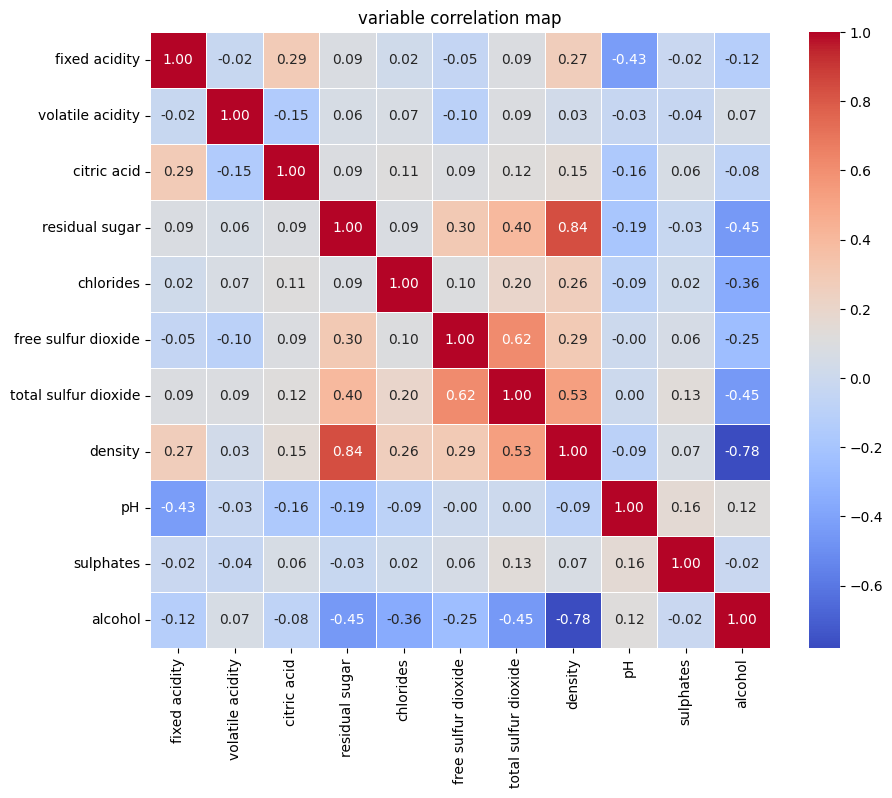


--- 多元迴歸結果 ---
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        08:44:50   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const           

<Figure size 1000x600 with 0 Axes>


--- 共線性檢測 (VIF) ---
                 Feature           VIF
0                  const  3.067856e+06
1          fixed acidity  2.691435e+00
2       volatile acidity  1.141156e+00
3            citric acid  1.165215e+00
4         residual sugar  1.264406e+01
5              chlorides  1.236822e+00
6    free sulfur dioxide  1.787880e+00
7   total sulfur dioxide  2.239233e+00
8                density  2.823255e+01
9                     pH  2.196362e+00
10             sulphates  1.138540e+00
11               alcohol  7.706957e+00

--- 殘差常態性檢定（Shapiro-Wilk） ---
Stat = 0.989, p = 0.000
殘差不服從常態分配


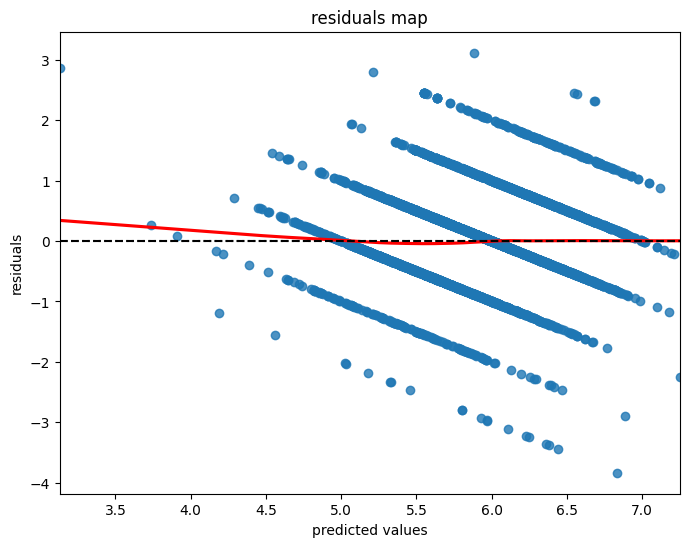

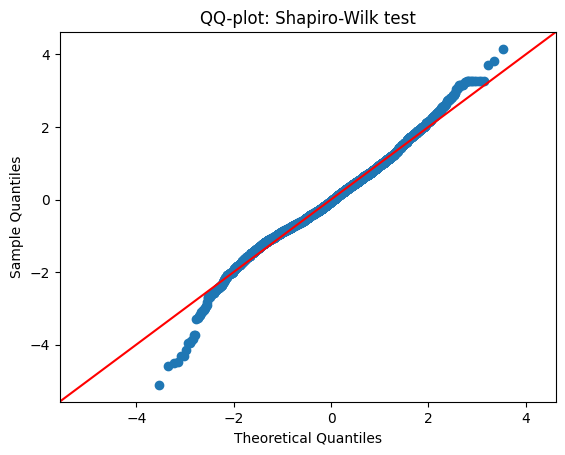


--- Global Test (Rainbow Test) ---
Stat = 1.060, p = 0.074
模型解釋度良好


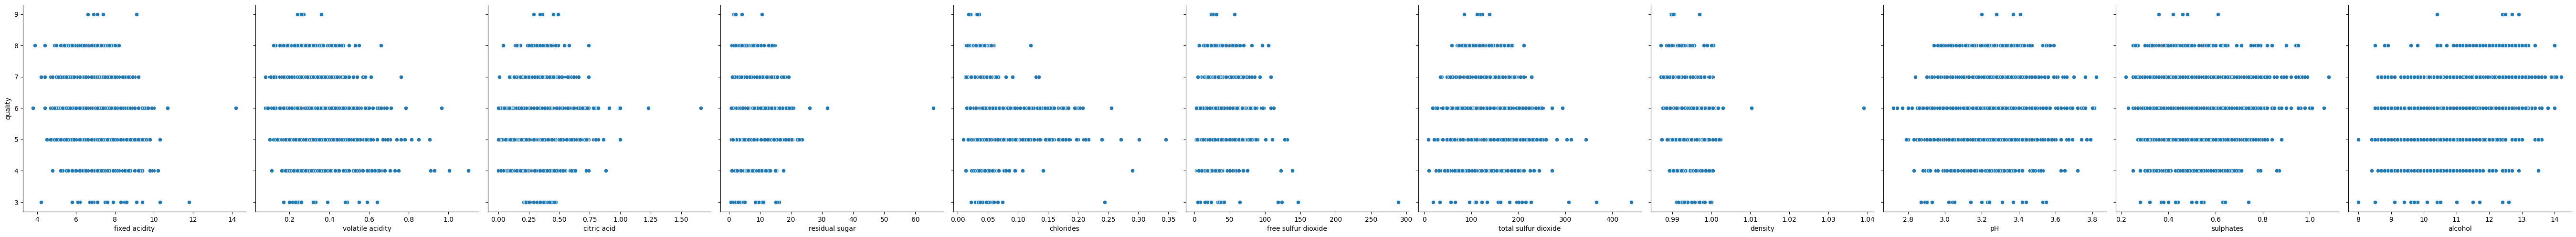

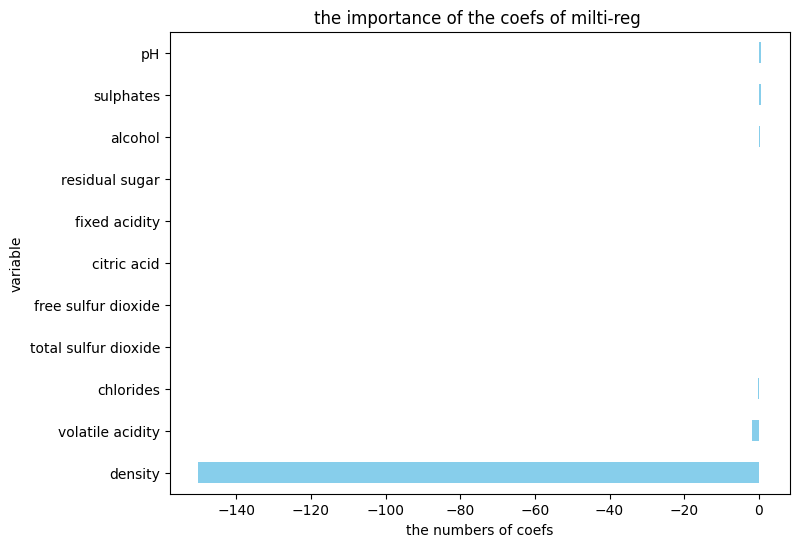

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

#下載數據
df = pd.read_excel("wine.xlsx")

#檢視數據類型
df.head()

#定義自變數矩陣
r_data = [col for col in df if col != "quality"]
r_data_1 = df[r_data].corr()

#相關係數計算
for col in r_data:
  correlation, p_value = stats.pearsonr(df["quality"], df[col])
  correlation_dict = {}
  correlation_dict[col] = correlation
  print(f"{col}: 相關係數={correlation:.3f}, P值={p_value:.3f}")
  print(".......................................................................")

plt.figure(figsize=(10, 8))
sns.heatmap(r_data_1, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("variable correlation map")
plt.show()

#以品質為應變數,其餘為自變數進行多元迴歸
if r_data:
    X = df[r_data]

    # 添加常數項
    X = sm.add_constant(X)

    y = df["quality"]
    model = sm.OLS(y, X).fit()
    print("\n--- 多元迴歸結果 ---")
    print(model.summary())
    plt.figure(figsize=(10, 6))

    plt.show()

    # 檢查共線性 (VIF)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\n--- 共線性檢測 (VIF) ---")
    print(vif_data)

    # 殘差分析: 殘差是否符合常態分配
    residuals = model.resid
    stat, p = stats.shapiro(residuals)
    print("\n--- 殘差常態性檢定（Shapiro-Wilk） ---")
    print(f"Stat = {stat:.3f}, p = {p:.3f}")
    if p > 0.05:
        print("殘差服從常態分配")
    else:
        print("殘差不服從常態分配")

    plt.figure(figsize=(8, 6))
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={"color": "red"})
    plt.xlabel("predicted values")
    plt.ylabel("residuals")
    plt.title("residuals map")
    plt.axhline(y=0, color="black", linestyle="--")
    plt.show()

    sm.qqplot(model.resid, line="45", fit=True)
    plt.title("QQ-plot: Shapiro-Wilk test")
    plt.show()
    # Global test
    rainbow_stat, rainbow_p = linear_rainbow(model)
    print("\n--- Global Test (Rainbow Test) ---")
    print(f"Stat = {rainbow_stat:.3f}, p = {rainbow_p:.3f}")
    if rainbow_p > 0.05:
        print("模型解釋度良好")
    else:
        print("模型解釋度不顯著")

#應變數與自變數散佈圖
sns.pairplot(df, x_vars=df.columns[:-1], y_vars=["quality"], height=5, aspect = 1)
plt.show()

#多元迴歸係數分布圖
coefs = pd.Series(model.params[1:], index=X.columns[1:])  # 排除截距項
coefs.sort_values().plot(kind="barh", figsize=(8, 6), color="skyblue")
plt.xlabel("the numbers of coefs")
plt.ylabel("variable")
plt.title("the importance of the coefs of milti-reg ")
plt.show()